# Covariance and Correlation

Covariance measures how two variables vary in tandem from their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be thought of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

First, let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation:

np.float64(0.02702975305067739)

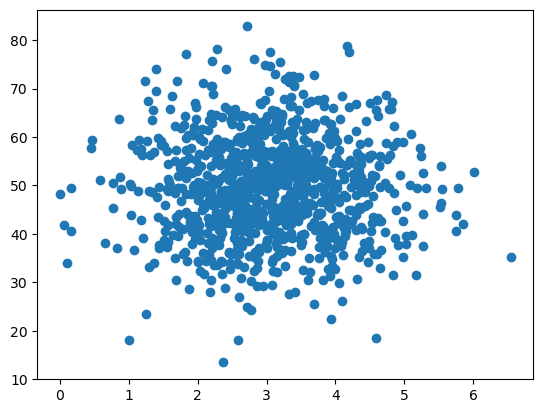

Bad pipe message: %s [b'\xe8\xa6r\xb1\xa8\x8b\x8cY\xe1\x0f\x8c!\x16Lt\xb8\x16\x1f \xa0\xcf\x9b\x93\x9e\xd4\x86']


In [1]:
%matplotlib inline

import numpy as np
from pylab import *

def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)


Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation. The negative value indicates an inverse relationship; pages that render in less time result in more money spent:

np.float64(-84.06526618117526)

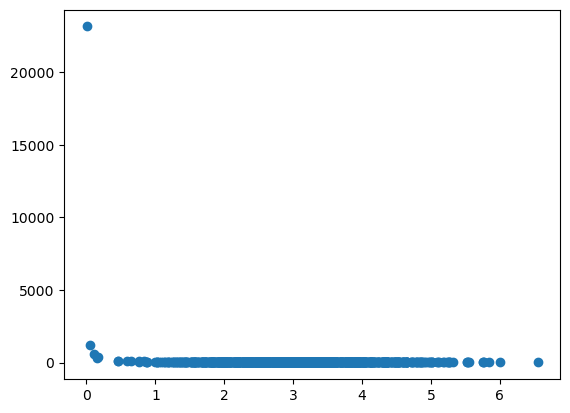

Bad pipe message: %s [b"\xdd\x9e\xd64W~\x8d\xe4\x0eOG\x0b\xb5\xcb\xaa\x00\xb2v \xc7\xe4\x92\x15\xcc\x10\x10&\xf9\x10\xf5\xefW\xe4\x0b;\x95\xe5\xc5\xa2\xe0\\\x1d\n\x17\x0eB\x05 z\xf7\\\x00$\x13\x01\x13\x02\x13\x03\xc0/\xc0+\xc00\xc0,\xc0'\xcc\xa9\xcc\xa8\xc0\t\xc0\x13\xc0\n\xc0\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x00p\x00\x17\x00\x00\xff\x01\x00\x01\x00\x00\n\x00\x08\x00\x06\x00\x1d\x00\x17\x00\x18\x00\x0b\x00\x02\x01\x00\x00#\x00\x00\x00\r\x00\x14\x00\x12\x04\x03\x08\x04\x04\x01\x05", b'\x05\x05']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x01\x02\x01\x003']
Bad pipe message: %s [b'\xc1\x9bb\x03\x9c6\x8e|[\xaa#\x9b=\xf0q\xd5\r\xcf \x81\x88PfT\xed\xae\xe0?5']
Bad pipe message: %s [b"\xc4\x9f0\xc0\x8b1e\xf8\xe0\xe8-\xbf\xb1\xc88^0l4G\x00$\x13\x01\x13\x02\x13\x03\xc0/\xc0+\xc00\xc0,\xc0'\xcc\xa9\xcc\xa8\xc0\t\xc0\x13"]
Bad pipe message: %s [b'bN\x07\xd1\x10|\xdbj\xdd\x00\xf1u\xcd\x86\x92\x86\xd3\xae {(K~\xc0<\x195\x89\xc7\xa9\x05\r\x95d}\x17\xeb\x9f@\xe2\x03"\xa8\x9e\x86\x96\xe

In [ ]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)

But, what does this value mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

In [4]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #In real life you'd check for divide by zero here

correlation(pageSpeeds, purchaseAmount)

np.float64(-0.11679929029461672)

Bad pipe message: %s [b">\x80uf:\x98\x8d\xad1\xc7\xcdK\xf6\xb3\xf7\xfdv\xd3 \xb5\xc5lU| G^\r\xc5\xe9\x0c\xab\x94\xdb\xd0k\xf2\xbbx\xe3\x04\x91\x9cw\x1b\xad\x0b\xefQ\x93b\x00$\x13\x01\x13\x02\x13\x03\xc0/\xc0+\xc00\xc0,\xc0'\xcc\xa9\xcc\xa8\xc0\t\xc0\x13\xc0\n\xc0\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x00p\x00\x17\x00\x00\xff\x01\x00\x01\x00\x00\n\x00\x08\x00\x06\x00\x1d\x00\x17\x00\x18\x00\x0b\x00\x02\x01\x00\x00#\x00\x00\x00\r\x00\x14"]
Bad pipe message: %s [b"\x9d`\x9d\x9cF\xf8\xc8\x19\x00J@\x96\\%q\x1e\x8f\x19 OZ\xf4\xf46MI\\C\x956k\xcf\xe3V\xaf,C\xaa\xd53\xcd/\x1bT\xe0\xfa\xf1\x07\xfd\xf1v\x00$\x13\x01\x13\x02\x13\x03\xc0/\xc0+\xc00\xc0,\xc0'"]
Bad pipe message: %s [b'g\xd0P\x80\xc9\xe3cn\xd4B%', b"+\xd0\xe6\x89\xb4 U\xf4\xd2.\xc3\x848L\xa9\xce\x0f\tV\xe4Y\x17\x16\x89\x90\xf7\xfb\x18\xdf\x95\xb6f\x13\x7f\xf1\xbb\x7fE\x00$\x13\x01\x13\x02\x13\x03\xc0/\xc0+\xc00\xc0,\xc0'\xcc\xa9\xcc\xa8\xc0\t\xc0\x13\xc0\n\xc0\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x00p\x00\x17\x00\x00\xff\x01\x00\x0

numpy can do all this for you with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

In [5]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.11668249],
       [-0.11668249,  1.        ]])

Bad pipe message: %s [b"@\x80k\xab\x08\xe0L\xa3#i\x1c(I}o\xb3n\xa2 \xfb\xe2U3X\xdak\x11\xc7\x95]\xb2\x90\xed\x7fg\xa9\x82\x01\xda^%(s\xd5%R`g\xaa;1\x00$\x13\x01\x13\x02\x13\x03\xc0/\xc0+\xc00\xc0,\xc0'\xcc\xa9\xcc\xa8\xc0\t\xc0\x13\xc0\n\xc0\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x00p\x00\x17\x00\x00\xff\x01\x00\x01\x00\x00\n\x00\x08\x00\x06\x00\x1d\x00\x17\x00\x18\x00\x0b\x00\x02\x01\x00\x00#\x00\x00\x00\r\x00\x14\x00\x12\x04\x03\x08\x04\x04\x01\x05\x03\x08\x05\x05\x01\x08\x06\x06\x01\x02\x01\x003\x00&\x00$"]
Bad pipe message: %s [b'R\xec\xe0=7\xdf\xed\x99W']
Bad pipe message: %s [b'\xae\xb5\xb9\xa8#+0 \xf8\xd3\xbd>ib', b'?\x84i\xd2x#\x0c\x90\xf5\xd0\x0eS8\xee\xfa\xa6\x82\xf5\xb0\xf1\xdc\xde']
Bad pipe message: %s [b"\x00$\x13\x01\x13\x02\x13\x03\xc0/\xc0+\xc00\xc0,\xc0'\xcc\xa9\xcc\xa8\xc0\t\xc0\x13\xc0\n\xc0\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x00p\x00\x17\x00\x00\xff\x01\x00\x01\x00\x00\n\x00\x08\x00\x06\x00\x1d\x00\x17\x00\x18\x00\x0b\x00\x02\x01\x00\x00#\x00\x00\x00\r\x00\x14\x0

(It doesn't match exactly just due to the math precision available on a computer.)

We can force a perfect correlation by fabricating a totally linear relationship (again, it's not exactly -1 just due to precision errors, but it's close enough to tell us there's a really good correlation here):

np.float64(-1.0010010010010015)

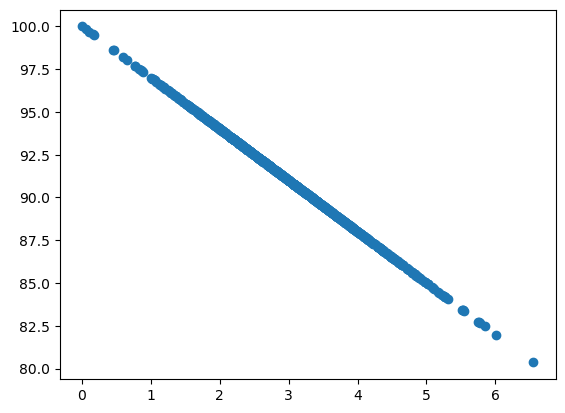

Bad pipe message: %s [b'\x02\xe6\x86\x91\x1a\xc9\xdb\'8>saC\x86)\x0c\xa5\xc2 \x00\xf8\x9d\x9a"\\V\x15(w\x81\x12\xfdf\xcb\x08a\x8a\xfdrv\t\x1e\x82\xa2\xf1\xc7\xdf\xfa\x8e@\x82\x00$\x13\x01\x13\x02\x13\x03\xc0/\xc0+\xc00\xc0,\xc0\'\xcc\xa9\xcc\xa8\xc0\t\xc0\x13\xc0\n\xc0\x14\x00\x9c\x00\x9d\x00/\x005', b'']
Bad pipe message: %s [b'\x0cV\x14\xa9r\x99\xaf\xb3\x7f\xaf!\x98\x83P!\xc2\xab\x82 \xc8@Pp\xa5\t\xeb\xcb|X\x8b\xd9"+\xbbNZ\x06pMj\t\x00\x90\xd45\xd7\x0e?\xc4\x14\xf7\x00$\x13\x01\x13\x02\x13\x03\xc0/\xc0+\xc00\xc0,\xc0\'\xcc\xa9\xcc\xa8\xc0\t\xc0\x13\xc0']
Bad pipe message: %s [b'\x14\x00\x9c\x00\x9d\x00/\x005']
Bad pipe message: %s [b'']
Bad pipe message: %s [b"\x93d/\x89W\xd2T\xcaR\xf0J\x18\xba\tm\x93\x18& \xa2\x03\x1d\xcbc\xc8\x93v\x00\xa5\x15\xedp0\x95\xdadLW\x17\x10Q\xde_&N\x8e\xc4HB\xbf\xa4\x00$\x13\x01\x13\x02\x13\x03\xc0/\xc0+\xc00\xc0,\xc0'\xcc\xa9\xcc\xa8\xc0\t\xc0\x13\xc0\n\xc0\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x00p"]
Bad pipe message: %s [b"\xf2\x8dHpTD\x92\xfe\x82\xe5\

In [ ]:
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)

correlation (pageSpeeds, purchaseAmount)

Remember, correlation does not imply causality!

## Activity

numpy also has a numpy.cov function that can compute Covariance for you. Try using it for the pageSpeeds and purchaseAmounts data above. Interpret its results, and compare it to the results from our own covariance function above.